In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 



ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/work/kotlarcm/WORK/Automated_Reduced/.venv/lib/python3.9/site-packages/traitlets/traitlets.py", line 632, in get
    value = obj._trait_values[self.name]
KeyError: '_control_lock'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/work/kotlarcm/WORK/Automated_Reduced/.venv/lib/python3.9/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/work/kotlarcm/WORK/Automated_Reduced/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 301, in dispatch_control
    async with self._control_lock:
  File "/work/kotlarcm/WORK/Automated_Reduced/.venv/lib/python3.9/site-packages/traitlets/traitlets.py", line 687, in __get__
    return t.cast(G, self.get(obj, cls))  # the G should encode the Optional
  File "/work/kotlarcm/WORK/Automated_Reduced/.venv/lib/python3.9/site-packages/traitl

In [2]:
Ref = pd.read_csv("Processing_Detailed.csv")
Start = pd.read_csv("Processing_Start.csv")
Optim = pd.read_csv("./log_True_scale_minmax/ABS/Processing_Optimized.csv")
Optim_name = "ABS_log_MM"
os.makedirs("Profile_plot",exist_ok=True)
os.makedirs(f"Profile_plot/{Optim_name}",exist_ok=True)

In [3]:
Phi_init = Ref["Phi_Init"].unique() 
T_init = Ref["T_Init"].unique() 

input_fitness_sp = ['Y_NH3', 'Y_H2', 'Y_O2', 'Y_H2O', 'Y_NO', 'Y_NO2', 'Y_N2O',  'Y_NNH', 'Y_HNO',"Y_N2"]



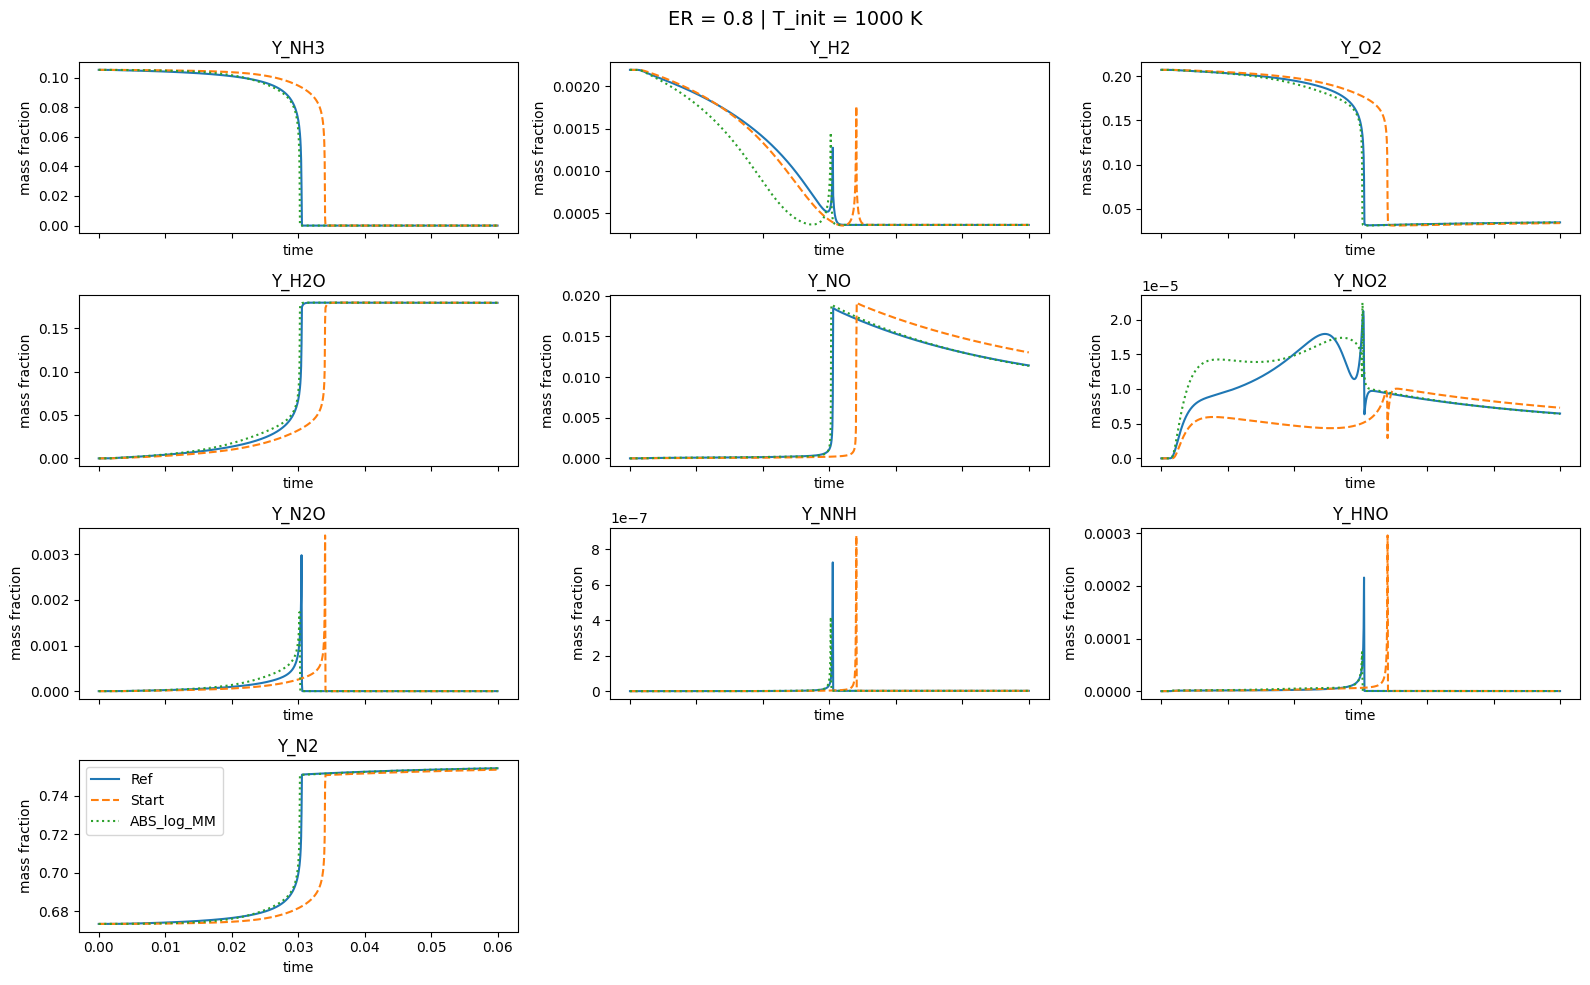

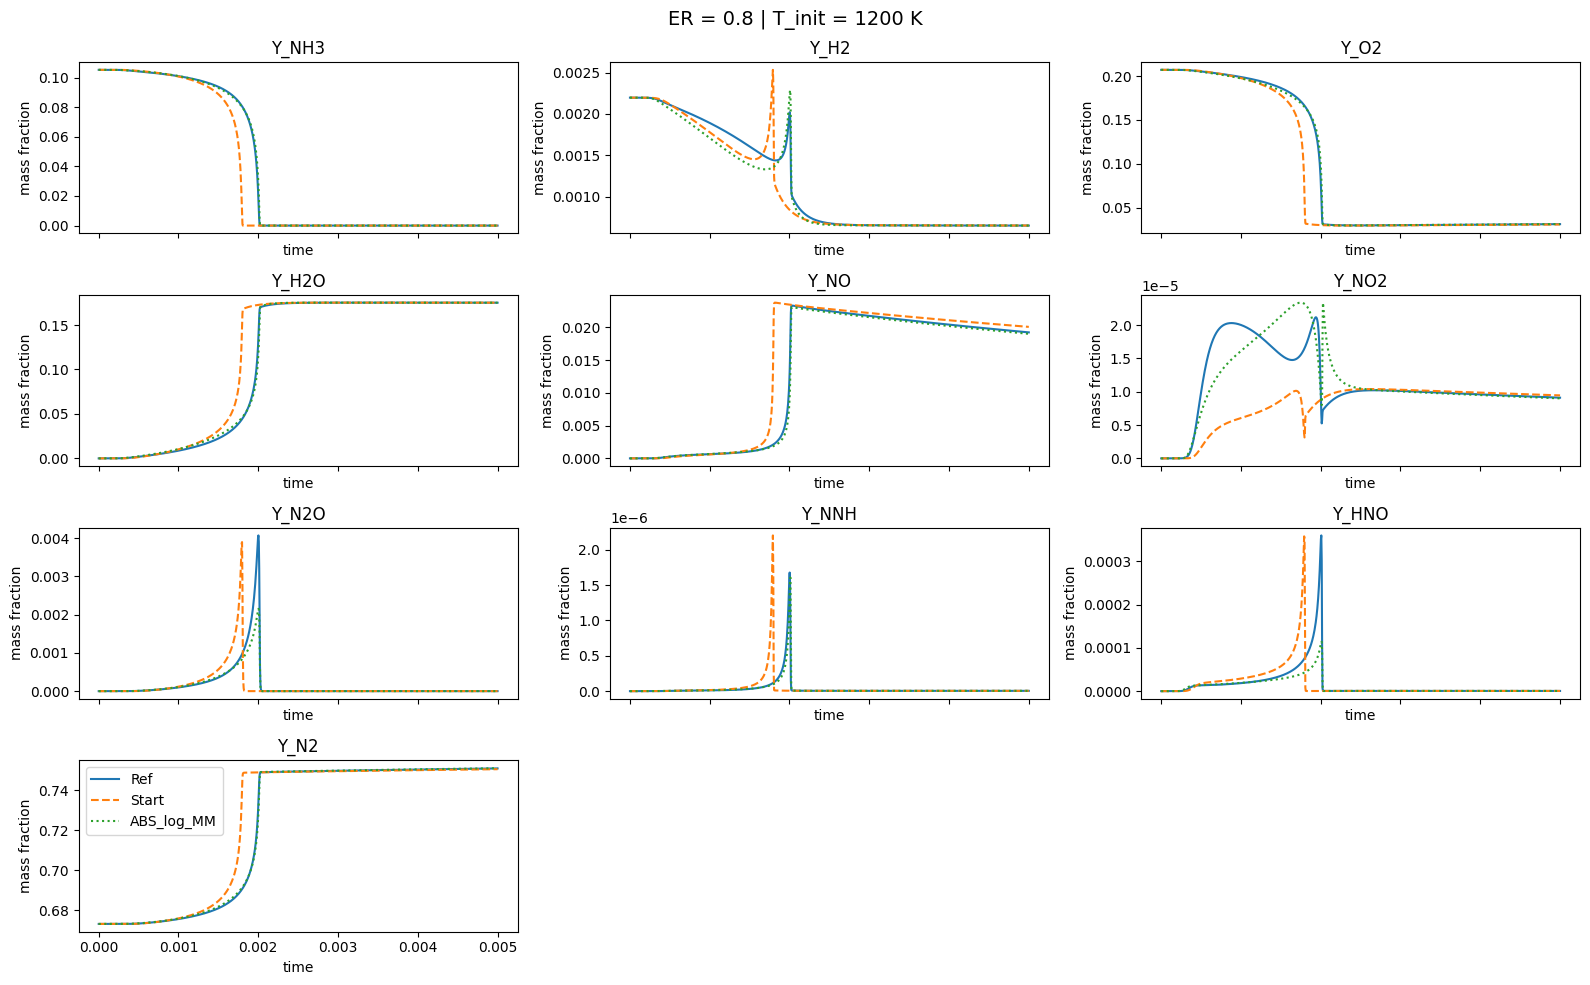

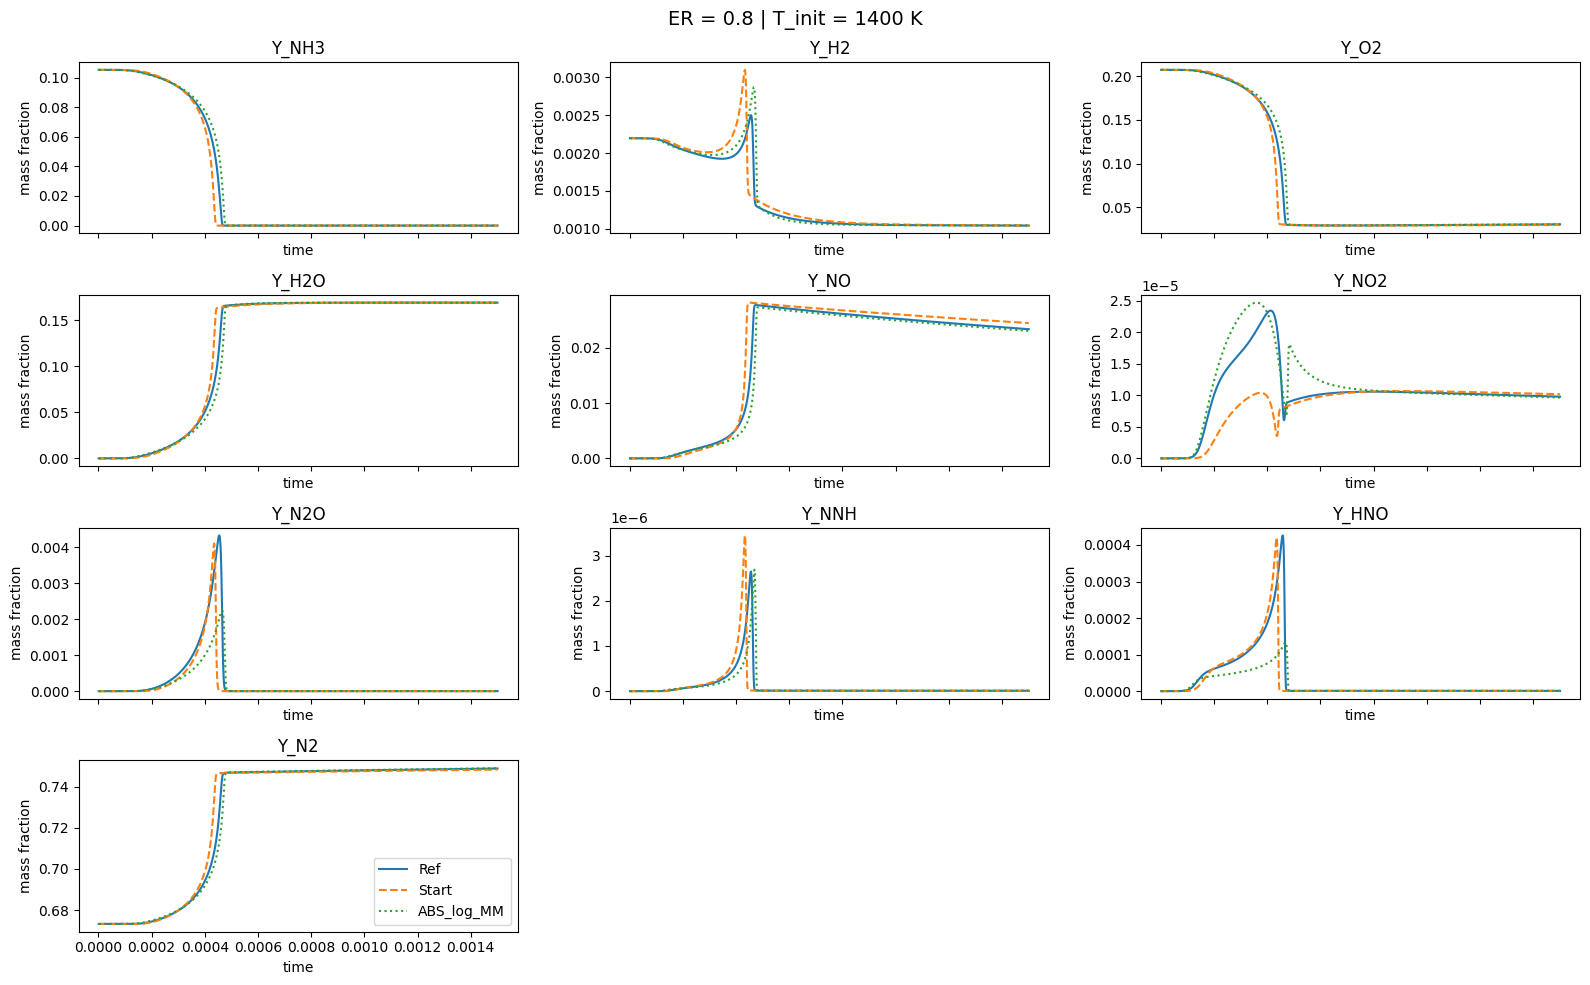

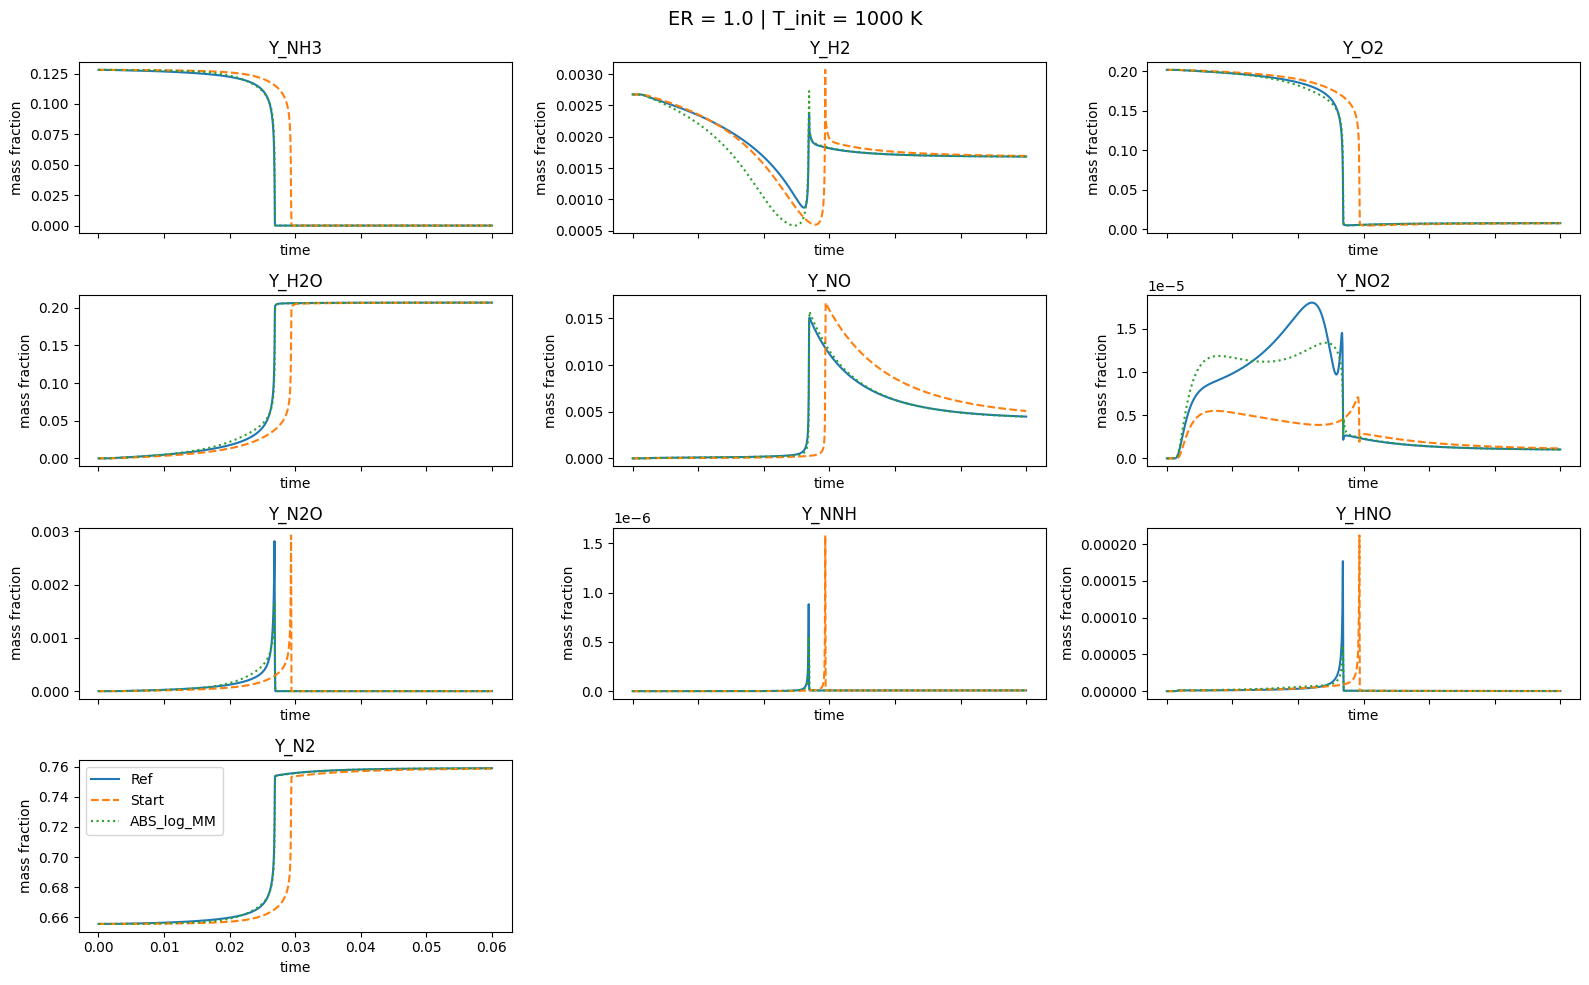

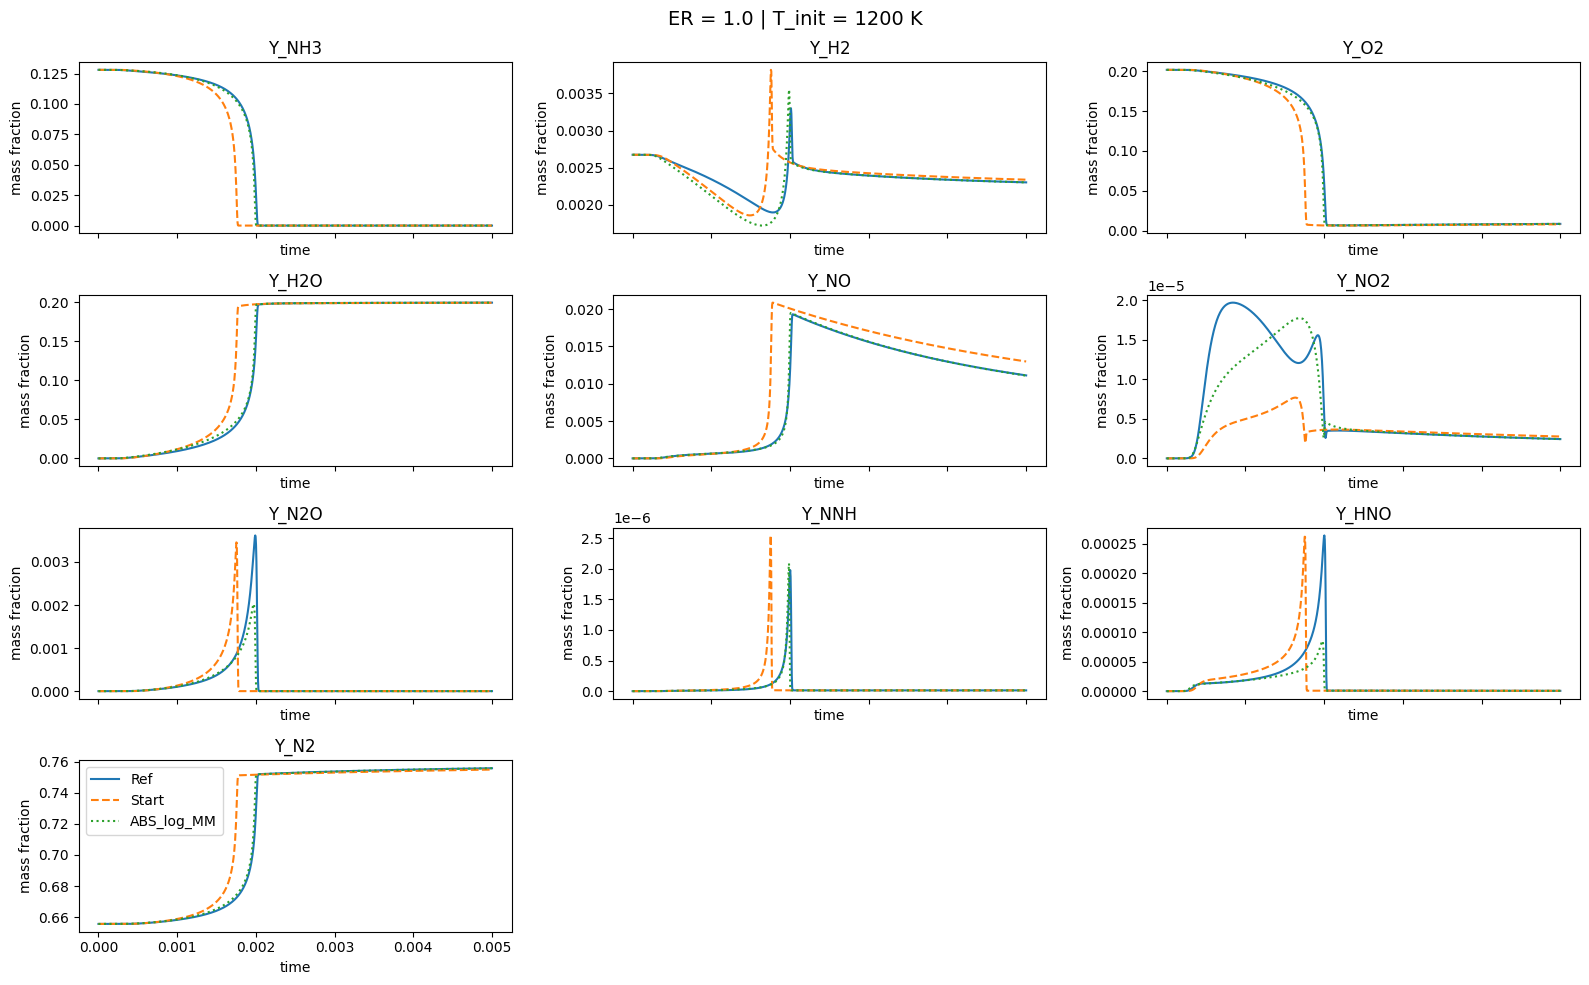

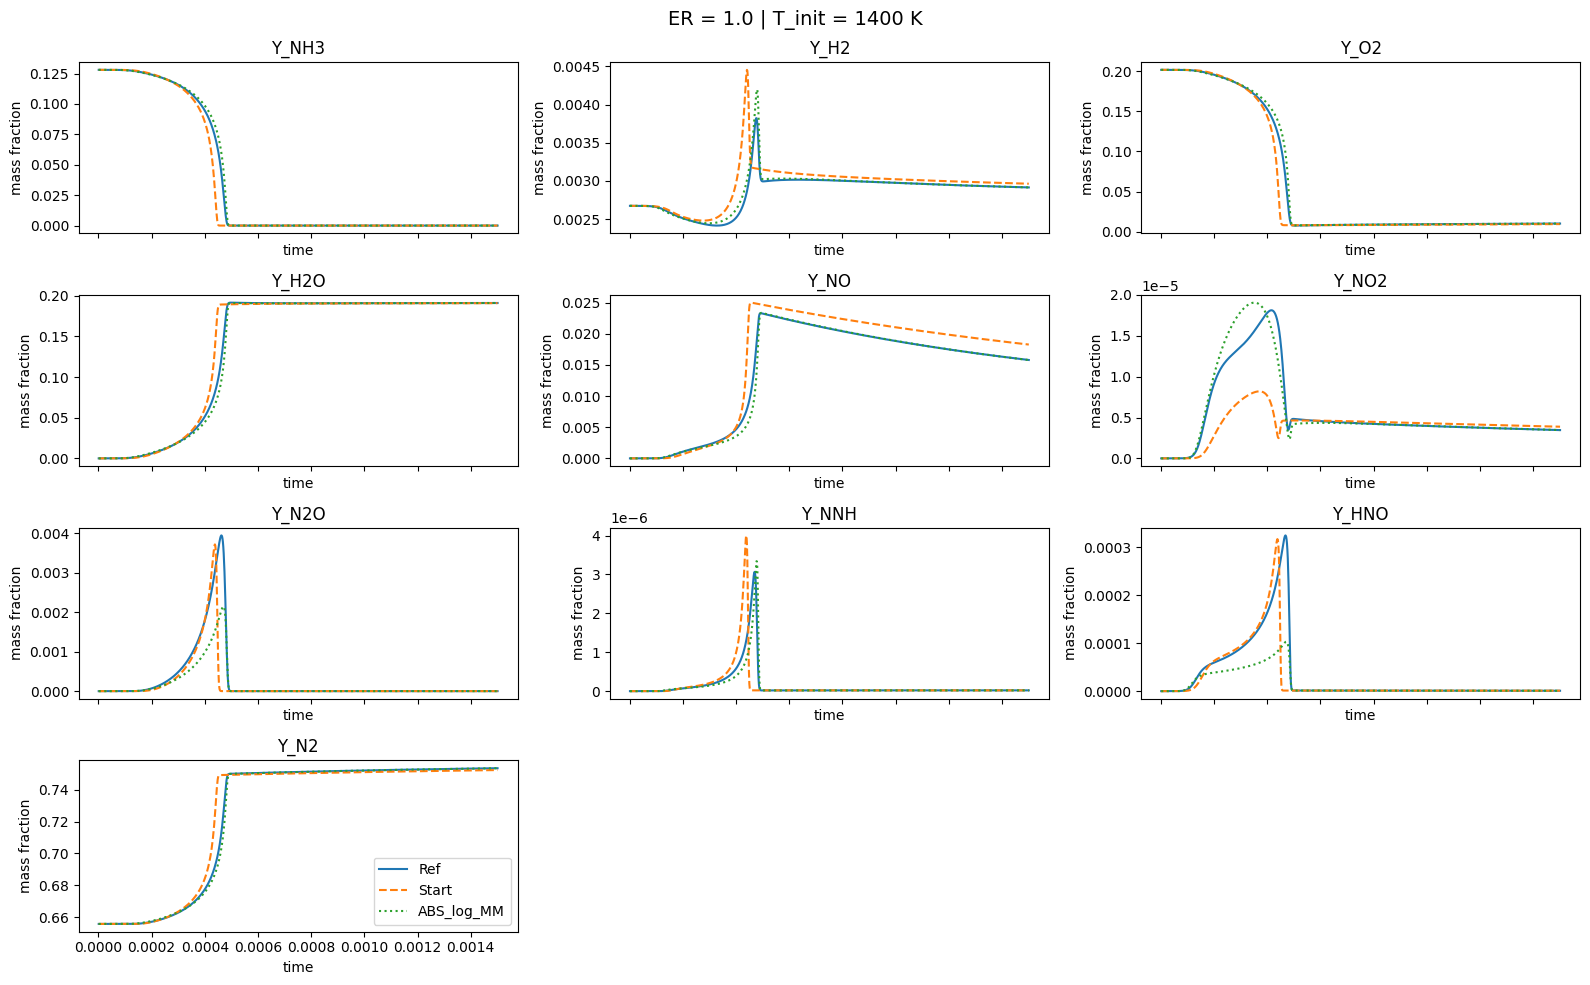

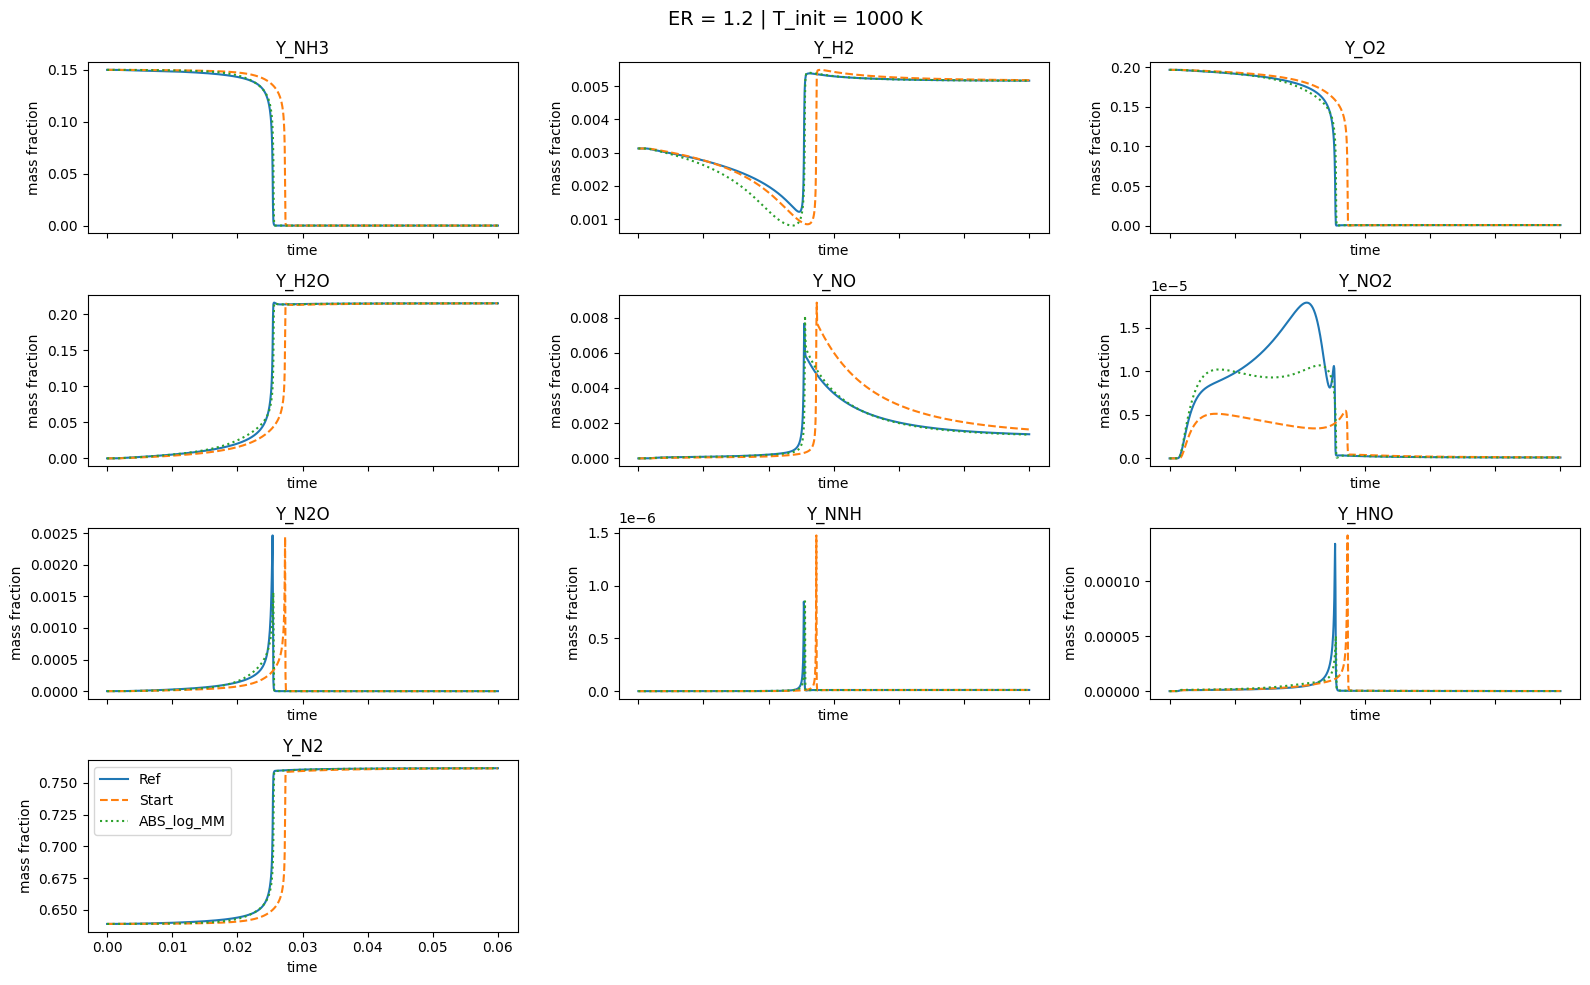

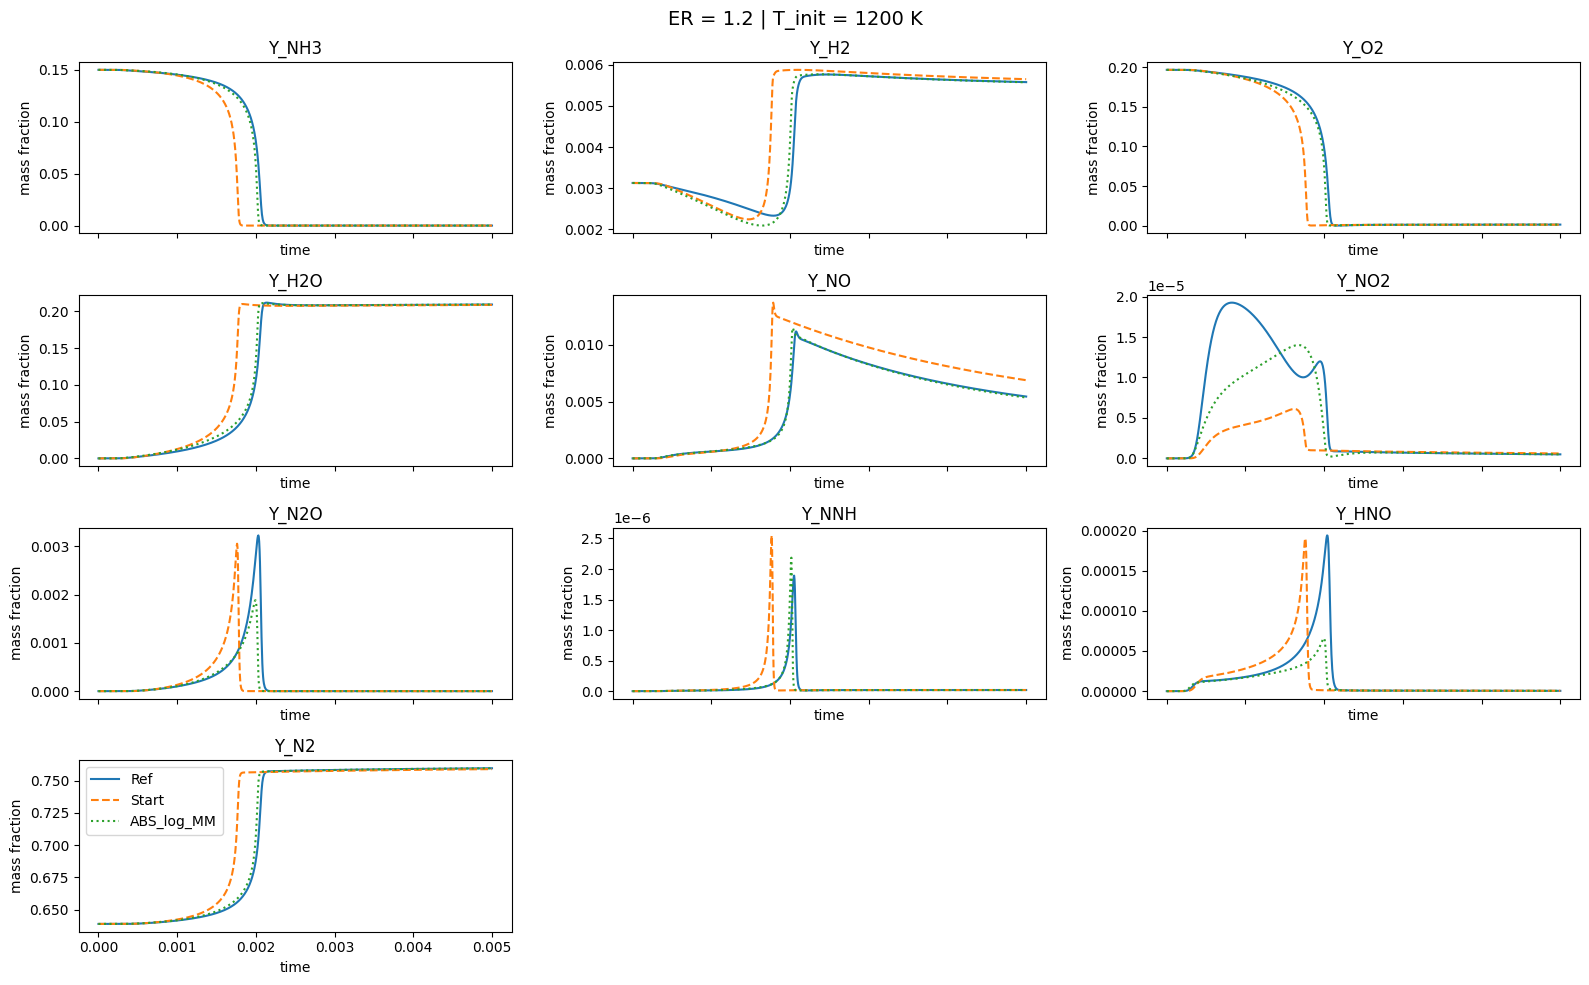

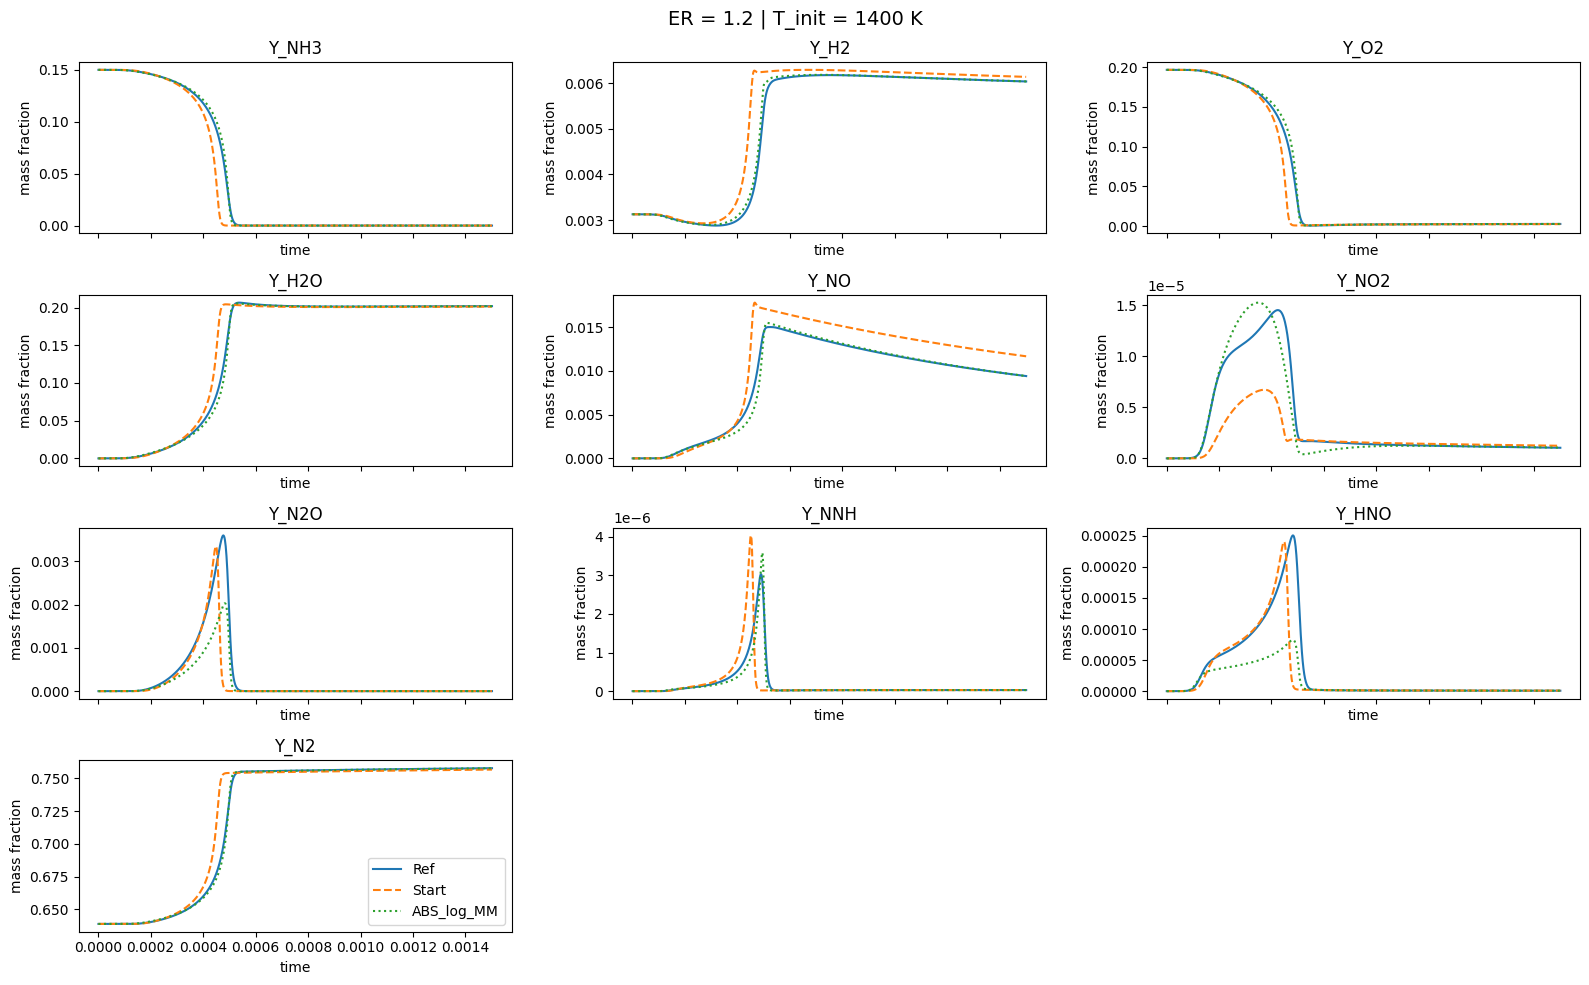

In [4]:

for ER in Phi_init:
    for T in T_init:
        loc_ref = Ref[(Ref["Phi_Init"] == ER) & (Ref["T_Init"] == T)]
        loc_start = Start[(Start["Phi_Init"] == ER) & (Start["T_Init"] == T)]
        loc_optim = Optim[(Optim["Phi_Init"] == ER) & (Optim["T_Init"] == T)]

        # Création figure
        fig, axes = plt.subplots(
            nrows=len(input_fitness_sp)//3 + (1 if len(input_fitness_sp) % 3 else 0),
            ncols=3,
            figsize=(16, 10),
            sharex=True
        )
        axes = axes.flatten()

        # Boucle sur les espèces
        for i, sp in enumerate(input_fitness_sp):
            ax = axes[i]
            ax.plot(loc_ref["common_grid"], loc_ref[sp], label="Ref")
            ax.plot(loc_start["common_grid"], loc_start[sp], linestyle='--', label="Start")
            ax.plot(loc_optim["common_grid"], loc_optim[sp], linestyle=':', label=f"{Optim_name}")

            ax.set_title(sp)
            ax.set_xlabel("time")
            ax.set_ylabel("mass fraction")

        # On retire les axes vides == si nb espèces pas multiple de 3
        for j in range(len(input_fitness_sp), len(axes)):
            fig.delaxes(axes[j])

        fig.suptitle(f"ER = {ER} | T_init = {T} K", fontsize=14)
        plt.tight_layout()
        plt.legend()
        name =f"ER_{ER}_T_{T}.png"
        plt.savefig(f"Profile_plot/{Optim_name}/{name}")
        plt.show()
